## <center>Sprawozdanie 5</center>
<center>Adrian Janakiewicz</center>

***Imports***

In [1]:
from math import cos 
import numpy as np
import scipy.sparse 
import scipy.linalg as sc_la
import scipy.sparse.linalg as sc_sp
import time
import matplotlib.pyplot as plt

<a id='zad1'></a>
***Zadanie 1.***  

In [2]:
A  = np.array([[1,1],[1,1.0001]])
b1 = np.array([[2],[2.0001]])
b2 = np.array([[2],[2]])

cond_A = np.linalg.cond(A, p=1)
result = [np.dot(np.linalg.inv(A), x) for x in [b1, b2]]
for res, b in zip(result, [b1, b2]):
    print("Rozwiazanie układu dla wektora\n {0} to \n{1}".format(b, res))
    
print("Rozwiązanie macierzy zmienia się dyrastycznie wraz z niewielką zmianą\nwektora wynikowego. Wynika to z dużego wskaźnika uwarunkowania\ndla macieczy A. cond(A) = {0} przez co badane równanie\njest niestabilne.".format(cond_A))

Rozwiazanie układu dla wektora
 [[2.    ]
 [2.0001]] to 
[[1.]
 [1.]]
Rozwiazanie układu dla wektora
 [[2]
 [2]] to 
[[2.]
 [0.]]
Rozwiązanie macierzy zmienia się dyrastycznie wraz z niewielką zmianą
wektora wynikowego. Wynika to z dużego wskaźnika uwarunkowania
dla macieczy A. cond(A) = 40004.0001000044 przez co badane równanie
jest niestabilne.


<a id='zad2'></a>
***Zadanie 2.***   

In [3]:
n = 8
x = []
for i in range(1, n+1):
    for j in range(1, n+1):
        x.append(1/(i+j-1))

A = np.reshape(np.array(x),(n,n))
cond_col_A  = np.linalg.cond(A, p = 1)
cond_row_A  = np.linalg.cond(A, p = np.inf)
cond_spec_A = np.linalg.cond(A, p = 2)

In [4]:
print("Wartość wskażnika uwarunkowania w normie kolumnowej: {}".format(cond_col_A))
print("Wartość wskażnika uwarunkowania w normie wierszowej: {}".format(cond_row_A))
print("Wartość wskażnika uwarunkowania w normie spektralnej: {}".format(cond_spec_A))
print("Na tej podstawie mozna stwierdzić, że macierz Hilberta jest macierzą źle uwarunkowaną.")

Wartość wskażnika uwarunkowania w normie kolumnowej: 33872789110.107353
Wartość wskażnika uwarunkowania w normie wierszowej: 33872789109.75766
Wartość wskażnika uwarunkowania w normie spektralnej: 15257575566.627958
Na tej podstawie mozna stwierdzić, że macierz Hilberta jest macierzą źle uwarunkowaną.


<a id='zad3'></a>
***Zadanie 3.***  

In [5]:
n = 20
t = np.linspace(0, 1, n)
b = np.array([cos(4*x) for x in t])
A = np.fliplr(np.vander(t, n))
times = []
iterations = 10000

In [6]:
# Ad. 1
x_1 = [] # First solution
start = time.time()
for i in range(iterations):
    x_1 = np.linalg.solve(A, b)
end = time.time()
times.append(end-start)

In [7]:
# Ad. 2
x_2 = [] # Second solution
start = time.time()
for i in range(iterations):
    Q, R = np.linalg.qr(A)
    x_2 = sc_la.solve_triangular(R, np.dot(np.transpose(Q), b))
end = time.time()
times.append(end-start)

In [8]:
# Ad. 3
x_3 = [] # Third solution
start = time.time()
for i in range(iterations):
    x_3, trash1, trash2, trash3 = np.linalg.lstsq(A, b, rcond=None)
end = time.time()
times.append(end-start)
# Dla macierzy kwadratowej ta metoda zwraca, z dokładnoscią do błędu zaokrąglenia, dokładna wartość.

In [9]:
print("Porównanie czasów obliczeń:\n 1.numpy.solve: {0};\n 2.Metoda QR:   {1};\n 3.numpy.lstsq: {2};".format(times[0]/iterations, times[1]/iterations, times[2]/iterations))

Porównanie czasów obliczeń:
 1.numpy.solve: 5.2018141746521e-05;
 2.Metoda QR:   0.0003470967531204224;
 3.numpy.lstsq: 0.0002512566328048706;


In [10]:
print("Porównanie wyników obliczeń:\n 1.numpy.solve: \n{0};\n 2.Metoda QR: \n{1};\n 3.numpy.lstsq: \n{2};".format(x_1, x_2, x_3))

Porównanie wyników obliczeń:
 1.numpy.solve: 
[ 1.00000000e+00  3.30953043e-11 -8.00000000e+00  6.33265139e-08
  1.06666656e+01  1.19343604e-05 -5.68898338e+00  5.52670067e-04
  1.62294424e+00  8.40343848e-03 -3.11428540e-01  4.71220190e-02
 -4.24864458e-02  9.94680757e-02 -1.01489618e-01  7.35359410e-02
 -3.99003441e-02  1.50552962e-02 -3.48777868e-03  3.73212311e-04];
 2.Metoda QR: 
[ 1.00000000e+00 -3.68372850e-11 -8.00000000e+00 -6.68223279e-08
  1.06666678e+01 -1.18057474e-05 -5.68879853e+00 -5.10742456e-04
  1.62758796e+00 -7.26296361e-03 -2.70154218e-01 -3.82348667e-02
  9.60780576e-02 -7.61559381e-02  7.02589345e-02 -5.34097741e-02
  2.86281041e-02 -1.04196293e-02  2.33851891e-03 -2.44422212e-04];
 3.numpy.lstsq: 
[ 1.00000000e+00  1.32997475e-11 -8.00000000e+00  2.27399505e-08
  1.06666663e+01  3.63061300e-06 -5.68891467e+00  1.32078403e-04
  1.62489928e+00  1.38430832e-03 -2.91765386e-01  3.94194537e-03
  3.18156585e-02 -1.48548542e-04  1.32017843e-03 -6.46255172e-03
  5.4466

In [11]:
print("Porównanie wartości residuum:\n 1.numpy.solve: {0};\n 2.Metoda QR:   {1};\n 3.numpy.lstsq: {2};".format( np.linalg.norm(b-np.dot(A, x_1), np.inf),  np.linalg.norm(b-np.dot(A, x_2), np.inf),  np.linalg.norm(b-np.dot(A, x_3), np.inf)))

Porównanie wartości residuum:
 1.numpy.solve: 1.887379141862766e-15;
 2.Metoda QR:   2.55351295663786e-15;
 3.numpy.lstsq: 7.549516567451064e-15;


<a id='zad4'></a>
***Zadanie 4.***  

In [12]:
def create_matrix(tau):
    A = np.ones((500,500))
    for i in range(500):
        for j in range(i+1, 500):
            A[j][i] = np.random.uniform(-1, 1)
            if(np.abs(A[j][i]) > tau):
                A[j][i] = 0
                A[i][j] = 0
            else:
                A[i][j] = A[j][i]
    return A

In [13]:
taus = [0.01, 0.05, 0.1, 0.2, 0.5, 0.75]
A_conditionals = []
solve_times = []
bicg_times = []
gmres_times = []
solutions = []
iterations = 1
    
b = np.array([np.random.uniform(-1,1) for x in range(500)])

for tau in taus:        
    A = create_matrix(tau)
    A_conditionals.append(np.linalg.cond(A))
    sparse_A = scipy.sparse.csr_matrix(A)
    solution = []
    iteration_solutions = []
    
    start = time.time()
    for i in range(iterations):
        solution = np.linalg.solve(A, b)
    solve_times.append((time.time()-start)/iterations)
    iteration_solutions.append(solution)
    
    start = time.time()
    for i in range(iterations):
        solution, success = sc_sp.bicg(A, b, atol='legacy')
    bicg_times.append((time.time()-start)/iterations)
    iteration_solutions.append(solution)
    
    # Niestety poniższa metoda zwraca wynikmi w czasie ponad 20s. Wykonanie jej iterations = 10000 razy,
    # jak powyższych metod, jest zbyt czasochłonne, lecz czas ten jest na tyle duży w porównaniu do poprzednich dwóch metod,
    # że można pominąć jej wykonywanie tyle razy
    iterations = 3
    start = time.time()
    for i in range(iterations):
        solution, succes = sc_sp.gmres(A, b, atol='legacy')
    gmres_times.append((time.time() - start)/iterations)
    iteration_solutions.append(solution)
    solutions.append(iteration_solutions)

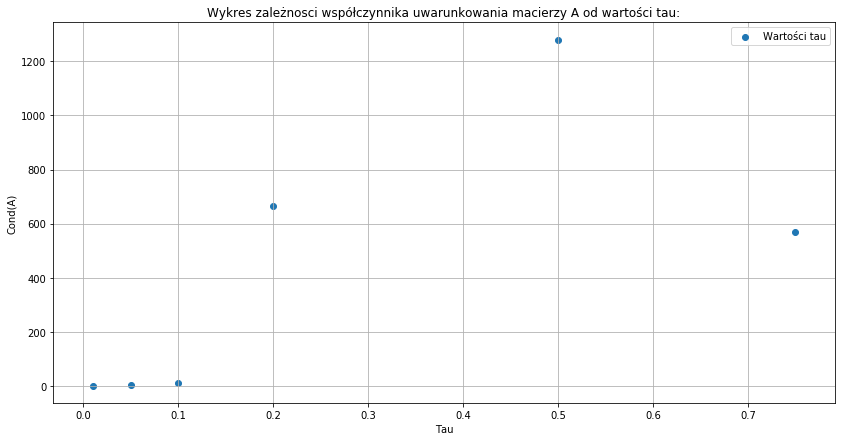

In [14]:
plt.figure(figsize=(14,7))
plt.scatter(taus, A_conditionals, label='Wartości tau')
plt.title('Wykres zależnosci współczynnika uwarunkowania macierzy A od wartości tau:')
plt.xlabel('Tau')
plt.ylabel('Cond(A)')
plt.grid()
plt.legend()
plt.show()

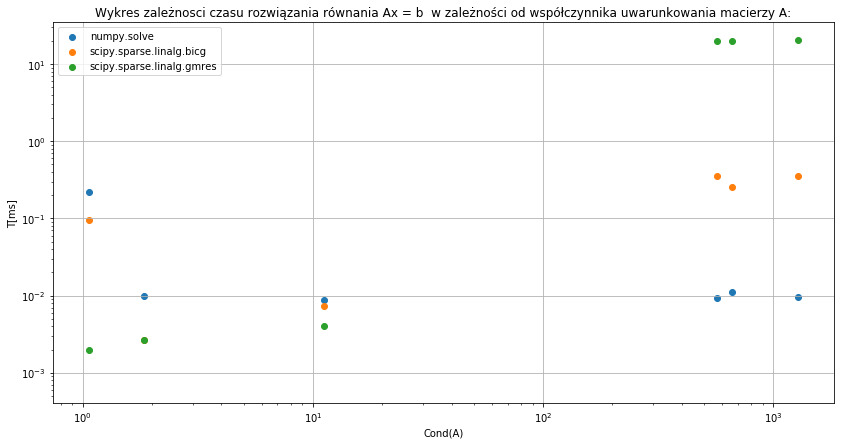

In [15]:
plt.figure(figsize=(14,7))
plt.scatter(A_conditionals, solve_times, label='numpy.solve')
plt.scatter(A_conditionals, bicg_times,  label='scipy.sparse.linalg.bicg')
plt.scatter(A_conditionals, gmres_times, label='scipy.sparse.linalg.gmres')
plt.title('Wykres zależnosci czasu rozwiązania równania Ax = b  w zależności od współczynnika uwarunkowania macierzy A:')
plt.xlabel('Cond(A)')
plt.ylabel('T[ms]')
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.grid()
plt.legend()
plt.show()

#### Dla macierzy dobrze uwarunkowanych scipy.sparse.linalg.gmres działa najszybciej, natomiast przy dużych warościach cond(A) metoda ta jest o ponad 3 klasy wielkości wolniejsza od funkcji numpy.solve.

<a id='zad5'></a>
***Zadanie 5.***  

In [16]:
def gauss_seidl(A, b, epsilon=1e-10):
    L = np.tril(A)
    D = np.diag(A)
    U = np.triu(A)
    M_gs = np.dot((-1) * np.linalg.inv(L + D), U)
    # Sprawdzanie zbierzności
    #
    if (max(np.abs(np.linalg.eigvals(M_gs)) > 1)):
        return False
    
    x = np.zeros(len(A))
    next_x = np.array(x)
    for i in range(len(A)):
        next_x[i] = (-1) / A[i][i] * (sum([A[i][j] * next_x[j] for j in range(0, i)]) + sum([A[i][j] * x[j] for j in range(i + 1, len(A))])) + b[i] / A[i][i]
        
    while (np.linalg.norm(next_x - x, 1) >= epsilon):
        x = next_x
        for i in range(len(A)):
            next_x[i] = (-1) / A[i][i] * (sum([A[i][j] * next_x[j] for j in range(0, i)]) + sum([A[i][j] * x[j] for j in range(i + 1, len(A))])) + b[i] / A[i][i]
    return next_x


# A = np.array([[1,2,3],[2,1,3],[3,2,1]])
# b = np.array([1,2,0])

A = np.array([[15,0],[-1,0.5]])
b = np.array([1,3])

print(gauss_seidl(A, b))
print(np.linalg.solve(A, b))

[0.06666667 6.13333333]
[0.06666667 6.13333333]


#### Powyzej zaimplementowana metoda Gaussa-Seidla zwraca poprawne wyniki (porównane z np.linalg.solve). Natomiast dla podanego przykładu metoda ta nie zwraca wyników, gdyż macierz ta nie spełnia warunku zbieżnosci tej metody - jej promień spektralny jest większy od 1.